In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

import numpy as np

**Loading previously cleaned datset**

In [19]:
train = pd.read_csv('UmojaHack/Train.csv')
test = pd.read_csv('UmojaHack/Test.csv')
submission_file = pd.read_csv('UmojaHack/SampleSubmission.csv')
describtion = pd.read_csv('UmojaHack/VariableDefinitions.csv') 

In [20]:
print(train.shape)
train = train.dropna(thresh=9)
train.shape

(2154048, 19)


(1419875, 19)

In [21]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total > 0]

,Total,Percent
ZONE2,1283134,0.903695
ZONE1,1254728,0.883689
TIGO,557945,0.392954
DATA_VOLUME,466460,0.328522
REGION,303675,0.213874
ORANGE,168874,0.118936
TOP_PACK,168478,0.118657
FREQ_TOP_PACK,168478,0.118657
ON_NET,157321,0.110799
MONTANT,40924,0.028822


In [22]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total > 0]

,Total,Percent
ZONE2,356051,0.936663
ZONE1,350266,0.921445
TIGO,227001,0.597171
DATA_VOLUME,187040,0.492046
TOP_PACK,158779,0.417700
FREQ_TOP_PACK,158779,0.417700
ORANGE,157230,0.413625
REGION,149728,0.393889
ON_NET,138514,0.364389
FREQUENCE_RECH,133055,0.350028


In [ ]:
# train.CHURN.value_counts().sort_index().plot.bar()

In [ ]:
# ax2 = train[['DATA_VOLUME', 'REGULARITY']].dropna().plot.scatter(x='DATA_VOLUME', y='REGULARITY')

In [ ]:
# train[['DATA_VOLUME']].plot.hist(bins=10, alpha=0.8)
# value_to_fill = train[['DATA_VOLUME']].describe().loc['50%'].values[0]
# mean_ = np.log(round(train[['DATA_VOLUME']].mean()[0]))
# mean_FREQ = round(np.log(train[['FREQ_TOP_PACK']].dropna().values).mean(), 2)


# fill_list = list(train[['DATA_VOLUME']].dropna().values.reshape(-1))

# m = train['DATA_VOLUME'].isnull()
# #set NaNs values
# # train.loc[m, 'DATA_VOLUME'] = np.random.choice(fill_list, size=m.sum())
# train['DATA_VOLUME'] = np.log(1+train[['DATA_VOLUME']])

# counts, bins = np.histogram(train[['DATA_VOLUME']])
# plt.hist(bins[:-1], bins, weights=counts)


In [23]:
train = train.drop(['user_id', 'MRG', 'ZONE2', 'ZONE1', 'TOP_PACK'], axis = 1)
test = test.drop(['user_id', 'MRG', 'ZONE2', 'ZONE1', 'TOP_PACK'], axis = 1)

def prep(train):
    feat_operator = train[['ON_NET', 'ORANGE', 'TIGO']]
    feat_operator = feat_operator.apply(lambda x:x.fillna(x.value_counts().index[0]))
    train[['ON_NET', 'ORANGE', 'TIGO']] = feat_operator
    #------------------------------------------
    columns_means = ['MONTANT', 'FREQUENCE_RECH', 'FREQUENCE', 'REVENUE', 'FREQ_TOP_PACK']

    for column_mean in columns_means:
        mean_rev = round(np.log(train[[column_mean]].mean()[0]), 2)
        train[column_mean] = np.log(train[[column_mean]].fillna(mean_rev))
    #-------------------------------------
    mean_rev = round(np.log(1+train[['ARPU_SEGMENT']].mean()[0]), 2)
    train['ARPU_SEGMENT'] = np.log(1+train[['ARPU_SEGMENT']].fillna(mean_rev))

    train['REGION'] = train[['REGION']].fillna('unknown')

    fill_list = list(train[['DATA_VOLUME']].dropna().values.reshape(-1))

    m = train['DATA_VOLUME'].isnull()
    #set NaNs values
    train.loc[m, 'DATA_VOLUME'] = np.random.choice(fill_list, size=m.sum())
    train['DATA_VOLUME'] = np.log(1+train[['DATA_VOLUME']])
    return train

train = prep(train)
test = prep(test)
    
# train['REGION'].value_counts().sort_index().plot.bar()

# counts, bins = np.histogram(train[['FREQUENCE_RECH']])
# plt.hist(bins[:-1], bins, weights=counts)

In [24]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total > 0]

,Total,Percent


In [25]:
train_one = pd.get_dummies(train[['TENURE', 'REGION']], prefix='o')
test_one = pd.get_dummies(test[['TENURE', 'REGION']], prefix='o')

concat_train = pd.concat([train, train_one], axis=1)
concat_test = pd.concat([test, test_one], axis=1)

concat_train = concat_train.drop(['TENURE', 'REGION'], axis = 1)
concat_test = concat_test.drop(['TENURE', 'REGION'], axis = 1)


In [84]:
train = concat_train
test = concat_test

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # enc = OneHotEncoder(handle_unknown='ignore')

# drop_enc = OneHotEncoder(drop='first').fit(train[['TENURE', 'REGION']])

# one = drop_enc.transform(train[['TENURE', 'REGION']])
# one.shape

**TARGET VARIABLE**

In [ ]:
# count_no_churn = (train['CHURN'] == 0).sum()
# print("Number of customers who didn't churn:",count_no_churn)
# count_yes_churn = (train['CHURN']==1).sum()
# print("Number of customers who churnes:",count_yes_churn)
# pct_of_no_churn = count_no_churn/(count_no_churn+count_yes_churn)
# print("percentage of customers who didn't churn:", pct_of_no_churn*100)
# pct_of_yes_churn = count_yes_churn/(count_no_churn+count_yes_churn)
# print("percentage of customers who churned:", pct_of_yes_churn*100)

**BALANCING THE TARGET VARIABLE**

As we saw earlier, our target variable IS unbalanced.So I am going to balance the target variable with SMOTE (Synthetic Minority Oversampling Technique). With our training data created, I’ll up-sample minority sample( in our case the 'yes_churn' (customers who churn) sample using the SMOTE algorithm. At a high level, SMOTE:

1.Works by creating synthetic samples from the minor class ( yes-churn) instead of creating copies.

2.Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

**Splitting Dataset**

In [85]:
from sklearn.model_selection import train_test_split
X = train.loc[:, train.columns != 'CHURN']
y = train.loc[:, train.columns == 'CHURN']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))


Shape of X: (1419875, 34)
Shape of y: (1419875, 1)


In [87]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# numeric_columns = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',\
#                    'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'FREQ_TOP_PACK']

# X = scaler.fit_transform(X[numeric_columns])
# # test_ = scaler.fit_transform(concat_test[numeric_columns])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (993912, 11)
Number transactions y_train dataset:  (993912, 1)
Number transactions X_test dataset:  (425963, 11)
Number transactions y_test dataset:  (425963, 1)


In [46]:
# X_train, y_train = X_train[:50000], y_train[:50000]

In [54]:
# X_train.shape

(50000, 34)

**Oversamplying minority class with SMOTE**

In [90]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(np.sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(np.sum(y_train_res==0)))

After OverSampling, the shape of train_X: (1891438, 11)
After OverSampling, the shape of train_y: (1891438, 1) 

After OverSampling, counts of label '1': CHURN    945719
dtype: int64
After OverSampling, counts of label '0': CHURN    945719
dtype: int64


Now we have a perfect balanced data!I only over-sampled on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

**FITTING DIFFERENT MODELS**

Loading the Models

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
models = [#('knn', KNN), 
          #('logistic', LogisticRegression),
          ('tree', DecisionTreeClassifier),
          ('forest', RandomForestClassifier)
         ]

param_choices = [
#     {
#         'n_neighbors': range(1, 12)
#     },
#     {
#         'C': np.logspace(-3,6, 12),
#         'penalty': ['l1', 'l2']
#     },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params)
    grid.fit(X_train_res, y_train_res)
    s = f"{name}: best score: {grid.best_score_}"
    print(s)
    grids[name] = grid

**RANDOM FORESTS**

**Using Gridsearch to find the best parameters**

In [56]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [91]:
# from sklearn.ensemble import RandomForestClassifier
# rfc=RandomForestClassifier(random_state=42)

# rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# rfc.fit(X_train_res, y_train_res)

RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)

RF.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [75]:
from xgboost import XGBClassifier
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(X_train_res, y_train_res)

XGBClassifier(gamma=0.01, max_depth=7, min_child_weight=5, n_estimators=20,
              silent=True)

**Fitting Randon Forest Model** with best parameters

In [59]:
# rfc_best=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 50, max_depth=8, criterion='gini')

In [60]:
# rfc_best.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)

In [92]:
y_pred_rfc=RF.predict(X_test)

**Evaluating Random Forest Model**


In [93]:
from sklearn.metrics import confusion_matrix


confusion_matrix_forest = confusion_matrix(y_test, y_pred_rfc)
print(confusion_matrix_forest)

[[328780  76801]
 [  5923  14459]]


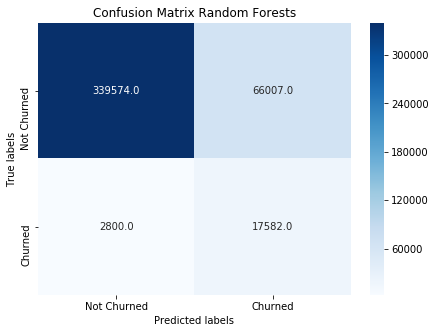

In [72]:
import seaborn as sns

#plotting a confusion matrix
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_forest,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Random Forests'); 

**Printing the Classification Report**

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc)) 

              precision    recall  f1-score   support

           0       0.98      0.81      0.89    405581
           1       0.16      0.71      0.26     20382

    accuracy                           0.81    425963
   macro avg       0.57      0.76      0.57    425963
weighted avg       0.94      0.81      0.86    425963



In [95]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_rfc)

6.707735527205009

**Calculating Area Under the Curve**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

y_pred_rfc=rfc_best.predict(X_test)
y_score_rfc = rfc_best.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score_rfc)
roc_auc_forests = auc(fpr, tpr)
print(roc_auc_forests)



**More efficient parameter tuning using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Setup the hyperparameter grid
c_space = np.logspace(-3,6, 12)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)

# Fit it to the data
best_model = logreg_cv.fit(X_train_res, y_train_res)

#examine the best model
print(best_model.best_score_)
print(best_model.best_params_)
print(best_model.best_estimator_)

**SVM MODELS**

**rbf kernel**

In [ ]:
# Finding best parameters for rbf kernel.
from sklearn.model_selection import GridSearchCV
from sklearn import svm

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(X_train_res,y_train_res,5)

In [ ]:
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.001) #Gamma is the free parameter of the Gaussian radial basis function.
model_svm2.fit(X_train_res, y_train_res)

In [ ]:
# predict out of sample
y_pred1 = model_svm2.predict(X_test)

In [ ]:
cm_svm_rbf=confusion_matrix(y_test,y_pred1)
print(cm_svm_rbf)

In [ ]:
labels = ['Not Churned', 'Churned']
ax= plt.subplot()
sns.heatmap(cm_svm_rbf,cmap="Blues", ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix SVM ');

In [ ]:
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_knn,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix KNN ');

**CALCULATING OPTIMAL THRESHOLD**

**Including Cost**

In [ ]:
def makecost(obs,prob,falsepos_cost,falseneg_cost,truepos_cost):
    def cost(cutoff):
        pred = np.array(prob > cutoff)
        fpos = pred * (1 - obs) 
        fneg = (1 - pred) * obs
        tpos=pred*obs
        return np.sum(fpos * falsepos_cost + fneg * falseneg_cost+ tpos*truepos_cost)
    return np.vectorize(cost)

In [ ]:
cut = np.linspace(0,1,100)
cost = np.zeros_like(cut)
from sklearn.model_selection import KFold, cross_val_predict
obs = np.ravel(y_train)

K = 10
for j in range(K):
    folds = KFold(n_splits=5,shuffle=True)
    prob = cross_val_predict(best_lr1,X_train,obs,cv=folds,method='predict_proba',n_jobs=5)[:,1]
    getcost = makecost(obs,prob,falsepos_cost=100,falseneg_cost=500,truepos_cost=200)
    currentcost = getcost(cut)/X_train.shape[0]
    cost += currentcost
    plt.plot(cut, currentcost,c='C0',alpha=0.05)
cost /= K

plt.plot(cut,cost,c='C0')
plt.xlabel('cutoff',fontsize = 15)
plt.ylabel('Expected cost per data point',labelpad=69,fontsize = 15,rotation=0)
plt.title("Optimal Threshold",fontsize=15)
despine()

In [ ]:
bestcut = cut[np.argmin(cost)]
bestcut

In [ ]:
min(cost)

**Finding the tpr and fpr for the optimal threshold**

In [ ]:

pd.set_option('display.max_rows', 500)
cutoff_list = pd.DataFrame(np.column_stack([tpr, fpr, thresholds]), 
                               columns=['tpr', 'fpr', 'thresholds'])
cutoff_list

**Finding the Optimal Threshold without including cost**

In [ ]:
# print the first 10 predicted probabilities of class membership
best_lr1.predict_proba(X_test)[0:10]

**Row: observation**

Each row, numbers sum to 1

**Column: class**

2 response classes there 2 columns

column 0: predicted probability that each observation is a member of class 0
column 1: predicted probability that each observation is a member of class 1

**Importance of predicted probabilities**

We can rank observations by probability of a customer churning

Prioritize contacting those with a higher probability

**There is a 0.5 classification threshold**

Class 1 is predicted if probability > 0.5

Class 0 is predicted if probability < 0.5

In [ ]:
# store the predicted probabilities for class 1 (ie customer will churn)
y_pred_prob = best_lr1.predict_proba(X_test)[:, 1]

In [ ]:
#Plot predicted probablities for class1
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.hist(y_pred_prob)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of a Customer Churning')
plt.ylabel('Frequency')
despine()

**Observation**

1.Most of observations have probability from between 0.1 and 0.2

2.Small number of observations with probability > 0.5

3.Most would be predicted "no churners" in this case

**Solution**

1.Decrease the threshold for predicting churners

2.Increase the sensitivity of the classifier

3.This would increase the number of TP

4.More sensitive to customers who churn

In [ ]:
# predict churners if the predicted probability is greater than 0.2
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.2 and 0 otherwise
y_pred_class = binarize([y_pred_prob], 0.4)[0]

In [ ]:
y_pred_prob

In [ ]:
y_pred_class[0:10]

**Confusion Matrix with Optimal Threshold**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
cm_optimal_threshold=confusion_matrix(y_test, y_pred_class)
print(cm_optimal_threshold)

In [ ]:
y_pred_log = best_lr1.predict(X_test)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix_log)

**COST EVALUATION**

There are costs associated with the model erroneously assigning false positives and false negatives. It is also important to look at similar costs associated with correct predictions of true positives and true negatives. Because the choice of the threshold affects all four of these statistics,it is important to consider the relative costs to the business for each of these four outcomes for each prediction.

What are the costs for my problem of customer churn?I will make some assumptions here.

**1.** I will assign the **true negatives** the cost of **USD 0**. My model essentially correctly identified a happy customer in this case, and I don’t need to do anything.

**2.** **False negatives** are the most problematic, because they incorrectly predict that a churning customer will stay. I will lose the customer and will have to pay all the costs of acquiring a replacement customer, including foregone revenue, advertising costs, administrative costs, point of sale costs. A quick search on the Internet reveals that such costs typically run in the hundreds of dollars so, for the purposes of this post, I will assume **USD 500**. This is the cost of false negatives.

**3.** Finally, for customers that my model identifies as churning, I will assume a retention incentive in the amount of **USD 100**.This is the cost of both true positive and false positive outcomes.In the case of false positives (the customer is happy,but the model mistakenly predicted churn),I will “waste” the USD 100 concession.

**It’s clear that false negatives are substantially more costly than false positives**. Instead of optimizing for total error, I should be minimizing a cost function that looks like this:

500∗FN(C)+0TN(C) + 100∗FP(C)+100TP(C)

C:Count

In [ ]:
no_churn = (y_test['Churn'] == 0).sum()
yes_churn=(y_test['Churn'] == 1).sum()
print("Not Churned:",no_churn)
print("Yes Churned:",yes_churn)

**Worst Case Scenario** 

I don't apply any model to predict churn and assume that no customer will churn.But in reality, 555 customers ended up churning.So to maintain my customer base, I would have to spend ($500*555) USD 277,500 .

**Best Case Scenario**

I have a model that correctly predicts who all will churn and to maintain the customer base, give them concessions ($100).So I would have to spend (555*100) USD 55500

**Model Predictions**
The models identifies, FN, and TP.So to maintain the current customer base, I would have to spend (116* 500)+(837* 100)=141700.So using a model will save  USD 135,800 in a month.


**Focussing retention efforts on all customers**
I don't apply any model and decide to focus rention efforts on all customers.So I give USD 100 worth of discounts to everyone.I would have to spend (100 * 2110)=211,000.So compared to focusing retention efforts on everyone, implementing the current model would save USD 69300.

**Graphs Depicting Different Scenarios**

In [ ]:
list_scenarios=['No Model','Discounts to All','Logistic Model','Ideal Model']
list_cost=[277500,211000,141700,55500]
df_list = pd.DataFrame(
    {'Scenario': list_scenarios,
     'Cost': list_cost
    })

In [ ]:
df_list

In [ ]:
from seaborn import despine

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6))
fig=sns.barplot(x="Scenario", y="Cost", data=df_list,
            label="Comparision of Business cASES", color="b")
for index, row in df_list.iterrows():
    fig.text(row.name,row.Cost, round(row.Cost,2), color='black', ha="center")
plt.xlabel("Scenarios",fontsize=15,labelpad=20)
plt.ylabel("Cost",rotation=0,labelpad=20,fontsize=15)
plt.title("Comparisions of Different Business Scenarios",fontsize=15)
despine()